# Trabajo Práctico - Organización de Datos

## Parte 1 - Análisis de datos
- Continanza, Nicolás (97576)
- De Angelis Riva, Lukas Nahuel  (103784)

In [ ]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/edit#gid=2054774482'
    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(csv_export_url)

https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv&gid=2054774482


In [ ]:
dataset = pd.read_csv(csv_export_url)

In [ ]:
dataset.size

423293

In [ ]:
dataset.columns

Index(['anios_estudiados', 'barrio', 'categoria_de_trabajo', 'edad',
       'educacion_alcanzada', 'estado_marital',
       'ganancia_perdida_declarada_bolsa_argentina', 'genero',
       'horas_trabajo_registradas', 'religion', 'rol_familiar_registrado',
       'tiene_alto_valor_adquisitivo', 'trabajo'],
      dtype='object')

In [ ]:
dataset.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


### Columnas categóricas

In [ ]:
dataset['estado_marital'].unique()

array(['sin_matrimonio', 'matrimonio_civil', 'divorciado',
       'pareja_no_presente', 'separado', 'matrimonio_militar', 'viudo_a'],
      dtype=object)

In [ ]:
dataset['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

In [ ]:
dataset['trabajo'].unique()

array(['entretenimiento', 'directivo_gerente', 'limpiador',
       'profesional_especializado', 'otros', 'ventas', 'reparador',
       'transporte', 'sector_primario', 'inspector', 'soporte_tecnico',
       nan, 'seguridad', 'ejercito', 'servicio_domestico'], dtype=object)

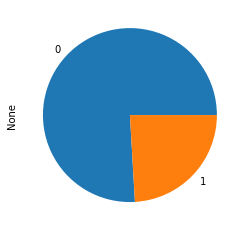

In [ ]:
dataset.groupby('tiene_alto_valor_adquisitivo').size().plot(kind='pie')

In [ ]:
dataset.describe()

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,tiene_alto_valor_adquisitivo
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,14.053868,38.581647,990.345014,40.437456,0.240810
std,2.664488,13.640433,7408.986951,12.347429,0.427581
min,1.000000,17.000000,-4356.000000,1.000000,0.000000
25%,13.000000,28.000000,0.000000,40.000000,0.000000
50%,14.000000,37.000000,0.000000,40.000000,0.000000
75%,16.000000,48.000000,0.000000,45.000000,0.000000
max,20.000000,90.000000,99999.000000,99.000000,1.000000


### Edades

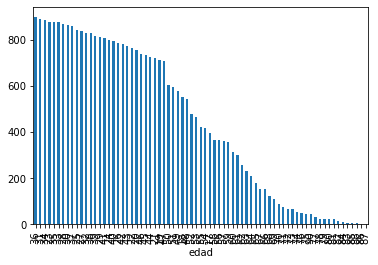

In [ ]:
dataset.groupby('edad').size().sort_values(
    ascending=False
).plot(kind='bar')

## Barrios

In [ ]:
dataset.groupby('barrio')['tiene_alto_valor_adquisitivo'].value_counts()



barrio         tiene_alto_valor_adquisitivo
Agronomia      0                               97
               1                                9
Almagro        0                               60
               1                               40
Balvanera      0                               70
                                               ..
Villa Soldati  1                                2
Villa Urquiza  0                               93
               1                               44
nuñez          0                               32
               1                                2
Name: tiene_alto_valor_adquisitivo, Length: 80, dtype: int64

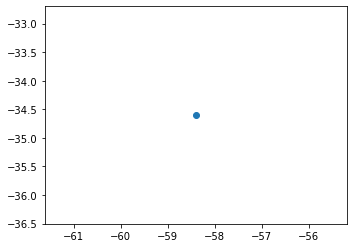